<a href="https://colab.research.google.com/github/Quantzaar/Strategy/blob/main/backtest%20results/Backtest_nifty50_momentum_strategy_12_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get NIFTY 50 stock symbols
stocks = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[2]['Symbol']
stocks = stocks + '.NS'

# Download historical data
df = yf.download(stocks.to_list(), start='2014-01-01')
df_close = df['Adj Close']
df_dret = df_close.pct_change()
df_mret = (df_dret + 1).resample('M').prod() - 1

# Calculate 12-month rolling returns
df_mret_12 = df_mret.rolling(12).apply(lambda x: (x + 1).prod() - 1).dropna()



[*********************100%%**********************]  50 of 50 completed


In [5]:
df_mret_12.head()

Ticker,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SHRIRAMFIN.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,0.847857,1.049038,0.171738,0.521194,0.964213,0.296200,0.723511,1.235687,0.053915,0.895938,...,0.664012,0.446659,-0.045693,0.327291,-0.043157,0.222798,0.431858,0.664451,0.518106,0.019138
2015-01-31,1.682023,1.329694,0.419697,0.837559,1.645814,0.285142,1.132173,1.665742,0.197314,1.115987,...,0.844072,0.561670,0.142057,0.681163,0.118909,0.140172,0.620122,0.956338,0.842474,0.073626
2015-02-28,1.857161,1.078137,0.422516,0.724406,1.261376,0.128910,0.973066,1.633556,0.246463,1.017868,...,0.975479,0.365654,0.133437,0.385317,0.040659,0.204347,0.532748,0.807043,0.705805,0.115097
2015-03-31,0.707603,0.650432,0.502048,0.496191,0.937806,-0.011114,0.798283,1.311554,0.249205,0.806236,...,0.465349,0.784585,0.006229,0.386056,-0.179618,0.232544,0.415956,0.500459,0.320790,0.178364
2015-04-30,0.647710,0.693725,0.278309,0.525237,0.890694,0.041244,0.727482,1.179449,0.172450,0.722937,...,0.332089,0.486239,-0.035220,0.243874,-0.082302,0.158547,0.369117,0.511920,0.323012,0.049535


In [9]:
top = df_mret_12.loc['2014-12-31'].nlargest(10)
a = df_mret.loc['2014-12-31':][1:3][top.index].mean(axis=1).values
a,top.index,df_mret.loc['2014-12-31':][1:3][top.index]

(array([0.11280543, 0.01479022]),
 Index(['EICHERMOT.NS', 'BAJFINANCE.NS', 'ADANIPORTS.NS', 'BRITANNIA.NS',
        'AXISBANK.NS', 'INDUSINDBK.NS', 'BPCL.NS', 'MARUTI.NS', 'ADANIENT.NS',
        'SBIN.NS'],
       dtype='object', name='Ticker'),
 Ticker      EICHERMOT.NS  BAJFINANCE.NS  ADANIPORTS.NS  BRITANNIA.NS  \
 Date                                                                   
 2015-01-31      0.079662       0.162631       0.068955      0.026575   
 2015-02-28     -0.028846       0.013961       0.015247      0.102938   
 
 Ticker      AXISBANK.NS  INDUSINDBK.NS   BPCL.NS  MARUTI.NS  ADANIENT.NS  \
 Date                                                                       
 2015-01-31     0.170581       0.084429  0.159211   0.095366     0.289944   
 2015-02-28    -0.035623      -0.006550 -0.006143  -0.011776     0.133987   
 
 Ticker       SBIN.NS  
 Date                  
 2015-01-31 -0.009299  
 2015-02-28 -0.029293  )

In [11]:
# Function to calculate top performers for a given date
def top_performers(date):
    top = df_mret_12.loc[date].nlargest(10)
    return df_mret.loc[date:][1:3][top.index].mean(axis=1).values

In [7]:
df_mret_12.index[:-2:2]

DatetimeIndex(['2014-12-31', '2015-02-28', '2015-04-30', '2015-06-30',
               '2015-08-31', '2015-10-31', '2015-12-31', '2016-02-29',
               '2016-04-30', '2016-06-30', '2016-08-31', '2016-10-31',
               '2016-12-31', '2017-02-28', '2017-04-30', '2017-06-30',
               '2017-08-31', '2017-10-31', '2017-12-31', '2018-02-28',
               '2018-04-30', '2018-06-30', '2018-08-31', '2018-10-31',
               '2018-12-31', '2019-02-28', '2019-04-30', '2019-06-30',
               '2019-08-31', '2019-10-31', '2019-12-31', '2020-02-29',
               '2020-04-30', '2020-06-30', '2020-08-31', '2020-10-31',
               '2020-12-31', '2021-02-28', '2021-04-30', '2021-06-30',
               '2021-08-31', '2021-10-31', '2021-12-31', '2022-02-28',
               '2022-04-30', '2022-06-30', '2022-08-31', '2022-10-31',
               '2022-12-31', '2023-02-28', '2023-04-30', '2023-06-30',
               '2023-08-31', '2023-10-31', '2023-12-31', '2024-02-29'],
     

In [12]:
# Calculate bimonthly returns of the strategy
bimonthly_ret = []
for date in df_mret_12.index[:-2:2]:  # Adjust index for 2-month rebalancing
    try:
        bimonthly_ret.extend(top_performers(date))
    except IndexError:
        continue

In [13]:
# Calculate portfolio value over time
portfolio_value = [1]
for r in bimonthly_ret:
    portfolio_value.append(portfolio_value[-1] * (1 + r))

In [22]:
len(df_mret_12.index[1::1])

113

In [23]:
len(portfolio_value[:])

113

In [28]:
# Create a DataFrame for portfolio value
portfolio_dates = df_mret_12.index[1:-1:1]  # Adjust dates for 1-month periods
portfolio_df = pd.DataFrame({
    'Date': portfolio_dates,
    'Portfolio Value': portfolio_value[1:]
})

In [29]:
portfolio_df

,Date,Portfolio Value
0,2015-01-31,1.112805
1,2015-02-28,1.129264
2,2015-03-31,1.108871
3,2015-04-30,1.107531
4,2015-05-31,1.196247
...,...,...
107,2023-12-31,5.595150
108,2024-01-31,6.131386
109,2024-02-29,6.351718
110,2024-03-31,6.498150


In [30]:
portfolio_df.set_index('Date', inplace=True)

In [34]:
len(bimonthly_ret)

112

[*********************100%%**********************]  1 of 1 completed

[0.11280543291183798, 0.014790219954994965, -0.018058302595468735]


Annualized Return: 22.42%
Annualized Volatility: 19.02%
Sharpe Ratio: 1.18
Beta: 0.94
Maximum Drawdown: -30.91%


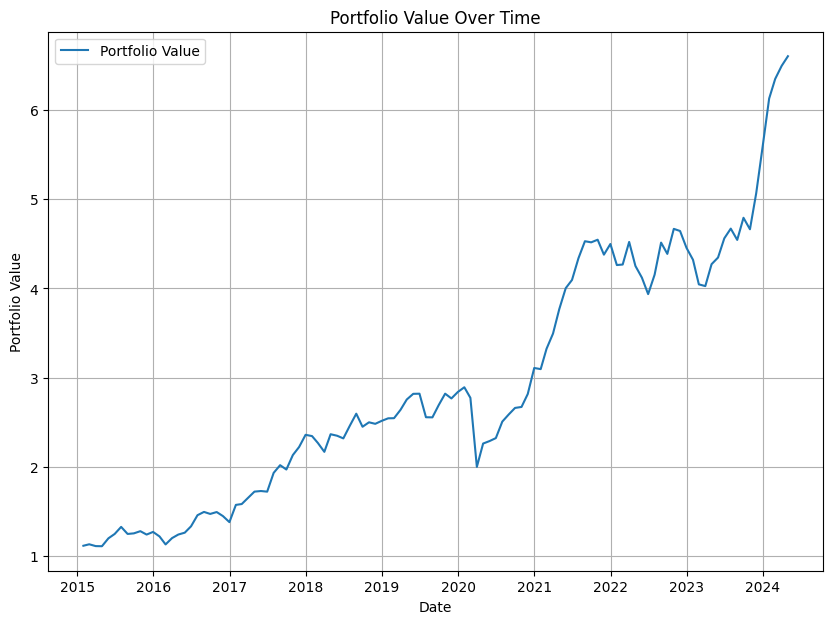

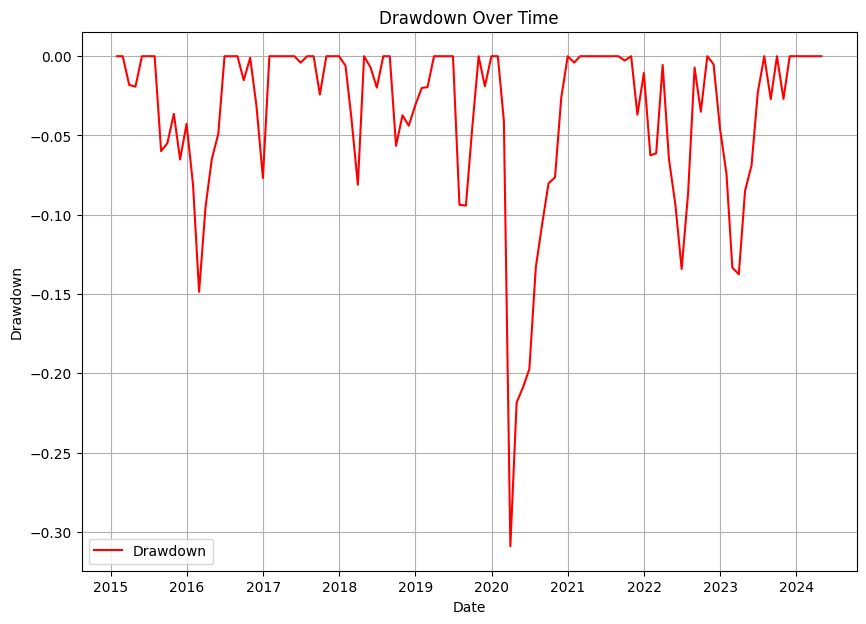

In [39]:
# Function to calculate top performers for a given date
def top_performers(date):
    top = df_mret_12.loc[date].nlargest(10)
    return df_mret.loc[date:][1:3][top.index].mean(axis=1).values

# Calculate bimonthly returns of the strategy
bimonthly_ret = []
for date in df_mret_12.index[:-2:2]:  # Adjust index for 2-month rebalancing
    try:
        bimonthly_ret.extend(top_performers(date)) #we use extend not append
    except IndexError:
        continue

print(bimonthly_ret[0:3])

# Calculate portfolio value over time
portfolio_value = [1]
for r in bimonthly_ret:
    portfolio_value.append(portfolio_value[-1] * (1 + r))

# # Create a DataFrame for portfolio value
# portfolio_dates = df_mret_12.index[2::2]  # Adjust dates for 2-month periods
# portfolio_df = pd.DataFrame({
#     'Date': portfolio_dates,
#     'Portfolio Value': portfolio_value[1:]
# })

# Create a DataFrame for portfolio value
portfolio_dates = df_mret_12.index[1:-1:1]  # Adjust dates for 1-month periods
portfolio_df = pd.DataFrame({
    'Date': portfolio_dates,
    'Portfolio Value': portfolio_value[1:]
})
portfolio_df.set_index('Date', inplace=True)

# Calculate drawdown
portfolio_df['Drawdown'] = portfolio_df['Portfolio Value'] / portfolio_df['Portfolio Value'].cummax() - 1

# Calculate Sharpe ratio
# annualized_return = np.prod([1 + r for r in bimonthly_ret]) ** (12 / (len(bimonthly_ret) / 2)) - 1
# annualized_std = np.std(bimonthly_ret) * np.sqrt(6)  # Adjusted for 2-month periods
annualized_return = np.prod([1 + r for r in bimonthly_ret]) ** (12 / len(bimonthly_ret) ) - 1
annualized_std = np.std(bimonthly_ret) * np.sqrt(12)
sharpe_ratio = annualized_return / annualized_std

# Calculate Beta
# Use NIFTY 50 index as benchmark
nifty50 = yf.download('^NSEI', start='2014-01-01')['Adj Close']
nifty50_mret = nifty50.pct_change().resample('M').apply(lambda x: (x + 1).prod() - 1).dropna()
# nifty50_bimonthly_ret = nifty50_mret[2::2]  # Adjust for 2-month periods
# cov_matrix = np.cov(nifty50_bimonthly_ret, bimonthly_ret)
cov_matrix = np.cov(nifty50_mret[df_mret_12.index[1]:df_mret_12.index[-2]], bimonthly_ret)
beta = cov_matrix[0, 1] / cov_matrix[0, 0]

print(f"Annualized Return: {annualized_return:.2%}")
print(f"Annualized Volatility: {annualized_std:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Beta: {beta:.2f}")
print(f"Maximum Drawdown: {portfolio_df['Drawdown'].min():.2%}")

# Plot portfolio value over time
plt.figure(figsize=(10, 7))
plt.plot(portfolio_df['Portfolio Value'], label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()

# Plot drawdown over time
plt.figure(figsize=(10, 7))
plt.plot(portfolio_df['Drawdown'], label='Drawdown', color='red')
plt.title('Drawdown Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()
